<a href="https://colab.research.google.com/github/bhushanrajs/sciml_project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/bhushanrajs/sciml_project/main/analysis_data.csv')
df = df.dropna()
df

,Model Name,Girder Type,Nb,L,S,w_oh,ts_U,ts_O,fc_deck,fc_girder,...,G3-A2-Y,G4-A2-Y,G1-A1-Z,G2-A1-Z,G3-A1-Z,G4-A1-Z,G1-A2-Z,G2-A2-Z,G3-A2-Z,G4-A2-Z
0,Tx28-L_45-Nb_4-S_60-O_15-ts_85,Tx28,4,540,72,18,8.5,8.5,4000,7000,...,880.440674,-1000.869019,0,0,0,0,0,0,0,0
1,Tx28-L_45-Nb_4-S_60-O_15-ts_100,Tx28,4,540,72,18,10.0,10.0,4000,7000,...,1138.782349,-1364.887085,0,0,0,0,0,0,0,0
2,Tx28-L_45-Nb_4-S_60-O_20-ts_85,Tx28,4,540,72,24,8.5,8.5,4000,7000,...,829.689697,-1071.558472,0,0,0,0,0,0,0,0
3,Tx28-L_45-Nb_4-S_60-O_20-ts_100,Tx28,4,540,72,24,10.0,10.0,4000,7000,...,1079.834351,-1457.175049,0,0,0,0,0,0,0,0
4,Tx28-L_45-Nb_4-S_60-O_25-ts_85,Tx28,4,540,72,30,8.5,8.5,4000,7000,...,757.181519,-1138.819336,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060,Tx84-L_160-Nb_4-S_80-O_35-ts_85,Tx84,4,1920,96,42,8.5,8.5,4000,7000,...,10792.476560,-12379.569340,0,0,0,0,0,0,0,0
2061,Tx84-L_160-Nb_4-S_90-O_30-ts_85,Tx84,4,1920,108,36,8.5,8.5,4000,7000,...,8513.214844,-10040.167970,0,0,0,0,0,0,0,0
2062,Tx84-L_160-Nb_4-S_90-O_35-ts_85,Tx84,4,1920,108,42,8.5,8.5,4000,7000,...,8378.083984,-10616.997070,0,0,0,0,0,0,0,0
2063,Tx84-L_160-Nb_4-S_100-O_25-ts_85,Tx84,4,1920,120,30,8.5,8.5,4000,7000,...,6496.878418,-8156.199707,0,0,0,0,0,0,0,0


In [32]:
tx_girders = {'Tx28' : {'D' : 28.0, 'b1' : 36.0, 'b2' : 7.0, 'b3' : 32.0, 'b4' : 2.0, 'b5' : 3.0, 'd1' : 3.5, 'd2' : 2.0, 'd3' : 2.0, 'd4' : 6.75, 'd5' : 3.0, 'd6' : 4.0, 'd7' : 6.75},
              'Tx34' : {'D' : 34.0, 'b1' : 36.0, 'b2' : 7.0, 'b3' : 32.0, 'b4' : 2.0, 'b5' : 3.0, 'd1' : 3.5, 'd2' : 2.0, 'd3' : 2.0, 'd4' : 12.75, 'd5' : 3.0, 'd6' : 4.0, 'd7' : 6.75},
              'Tx40' : {'D' : 40.0, 'b1' : 36.0, 'b2' : 7.0, 'b3' : 32.0, 'b4' : 2.0, 'b5' : 3.0, 'd1' : 3.5, 'd2' : 2.0, 'd3' : 2.0, 'd4' : 18.75, 'd5' : 3.0, 'd6' : 4.0, 'd7' : 6.75},
              'Tx46' : {'D' : 46.0, 'b1' : 36.0, 'b2' : 7.0, 'b3' : 32.0, 'b4' : 2.0, 'b5' : 3.0, 'd1' : 3.5, 'd2' : 2.0, 'd3' : 2.0, 'd4' : 22.0, 'd5' : 3.0, 'd6' : 4.75, 'd7' : 8.75},
              'Tx54' : {'D' : 54.0, 'b1' : 36.0, 'b2' : 7.0, 'b3' : 32.0, 'b4' : 2.0, 'b5' : 3.0, 'd1' : 3.5, 'd2' : 2.0, 'd3' : 2.0, 'd4' : 30.0, 'd5' : 3.0, 'd6' : 4.75, 'd7' : 8.75},
              'Tx62' : {'D' : 62.0, 'b1' : 42.0, 'b2' : 7.0, 'b3' : 32.0, 'b4' : 2.0, 'b5' : 3.0, 'd1' : 3.5, 'd2' : 2.5, 'd3' : 2.0, 'd4' : 37.5, 'd5' : 3.0, 'd6' : 4.75, 'd7' : 8.75},
              'Tx70' : {'D' : 70.0, 'b1' : 42.0, 'b2' : 7.0, 'b3' : 32.0, 'b4' : 2.0, 'b5' : 3.0, 'd1' : 3.5, 'd2' : 2.5, 'd3' : 2.0, 'd4' : 45.5, 'd5' : 3.0, 'd6' : 4.75, 'd7' : 8.75},
              'Tx84' : {'D' : 84.0, 'b1' : 58.0, 'b2' : 8.0, 'b3' : 38.0, 'b4' : 3.0, 'b5' : 3.0, 'd1' : 4.0, 'd2' : 3.5, 'd3' : 3.0, 'd4' : 55.75, 'd5' : 3.0, 'd6' : 6.0, 'd7' : 8.75}
              }

# bridge geometry data
L = df['L']/12 # span length in ft.
S = df['S']/12 # girder spacing in ft.
w_oh = df['w_oh']/12 # overhang width in ft.
ts = df['ts_U']/12 # thickness of overhang in ft.
girder = df['Girder Type']
girder_depth = []
for _, girder_type in girder.items():
  girder_depth.append(tx_girders[girder_type]['D'])
df['Girder_depth'] = girder_depth

# intensity of railing dead load in kip/ft
b_rail = df['b_rail_left'] # width of railing
q_rail = (df['q_rail_left'] * b_rail * 12)/1000

# max bending moment in exterior girder G1 & interior girder G2 in kip-ft
bm1 = df['G1 - max_bm']/(1000*12)
bm2 = df['G2 - max_bm']/(1000*12)

# reaction in girders G1 & G2 in kip. (only A1 taken due to symmetry)
r1 = df['G1-A1-Y']/1000
r2 = df['G2-A1-Y']/1000

# line analysis with full railing load assumed to be applied on a girder
bm_line = q_rail * L**2 / 8
r_line = q_rail * L / 2


# normalizing bending moments with respect to line analysis
n_bm1 = bm1 / bm_line
n_bm2 = bm2 / bm_line

# normalizing vertical reactions with respect to line analysis
n_r1 = r1 / r_line
n_r2 = r2 / r_line


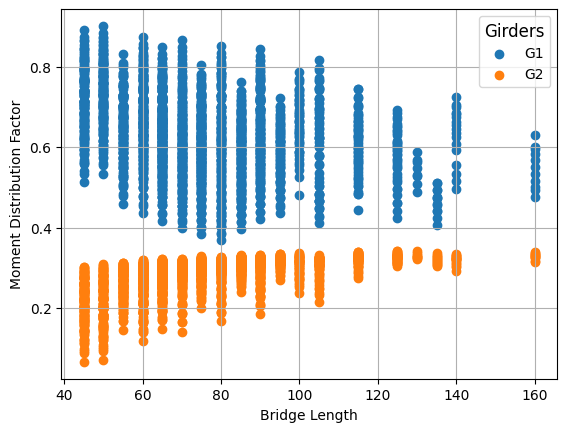

In [34]:
# Plot moment distribution factors
plt.scatter(L,n_bm1, label = "G1")
plt.scatter(L,n_bm2, label = "G2")

# axis labels
plt.xlabel(r'Bridge Length')
plt.ylabel(r'Moment Distribution Factor')

# change the axis limits
# ax.set_xlim(xmin = 0)
# ax.set_ylim(ymin = 0, ymax = 0.25)

# display a legend, set its title
leg = plt.legend()
leg.set_title('Girders', prop={'size':12})

plt.grid() # show a grid

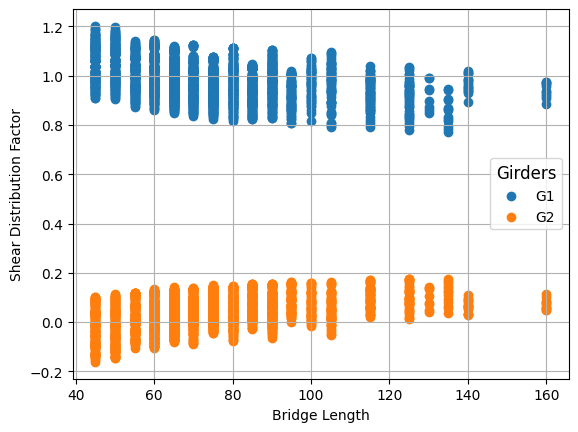

In [35]:
# Plot shear distribution factors
plt.scatter(L,n_r1, label = "G1")
plt.scatter(L,n_r2, label = "G2")

# axis labels
plt.xlabel(r'Bridge Length')
plt.ylabel(r'Shear Distribution Factor')

# change the axis limits
# ax.set_xlim(xmin = 0)
# ax.set_ylim(ymin = 0, ymax = 0.25)

# display a legend, set its title
leg = plt.legend()
leg.set_title('Girders', prop={'size':12})

plt.grid() # show a grid